<a href="https://colab.research.google.com/github/JoshK68/hotel/blob/main/API_Instructions_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/MyDrive/Datasets/Independent_projects/Human_trafficking')

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Datasets/Independent_projects/Human_trafficking"

In [7]:
!pip install kaggle

In [9]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 58 kB 2.6 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=00390579c119c1673797a11f987d0a655acb4bc1a113cd2c63e7efe9f965af1e
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [10]:
!kaggle competitions download -c hotel-id-2021-fgvc8

100% 24.4G/24.4G [08:29<00:00, 70.3MB/s]
100% 24.4G/24.4G [08:29<00:00, 51.4MB/s]


In [12]:
import pandas as pd

In [14]:
#import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import sys
from tqdm.autonotebook import tqdm
import seaborn as sns
import glob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [13]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/Independent_projects/Human_trafficking/train.csv.zip (Unzipped Files)/train.csv")
df.head() #/content/gdrive/MyDrive/Datasets/Independent_projects/Human_trafficking/train.csv

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


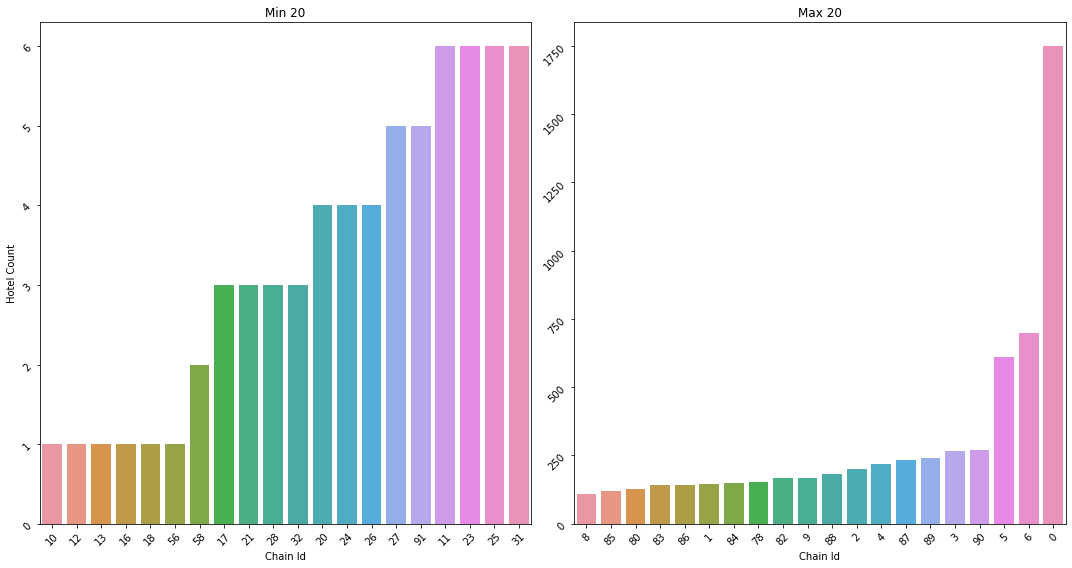

In [24]:
#Let's look at the hotel chains having minimum and maximum images

#Chains VS num images

chain_ids = []
chain_values = []
for chain_id in df.chain.unique():
    chain_ids.append(str(chain_id))
    chain_values.append(len(df[df.chain == chain_id].hotel_id.unique()))
    
chain_ids = [x for _, x in sorted(zip(chain_values, chain_ids))]
chain_values = sorted(chain_values)


figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8), squeeze=False)

names = chain_ids[:20]
values = chain_values[:20]

sns.barplot(x=names, y=values, ax = axes[0][0])
plt.xticks(rotation=45)


names = chain_ids[-20:]
values = chain_values[-20:]

sns.barplot(x=names, y=values, ax = axes[0][1])
plt.xticks(rotation=45)

axes[0, 0].set_title("Min 20")
axes[0, 1].set_title("Max 20")
axes[0,0].tick_params(labelrotation=45)
axes[0,1].tick_params(labelrotation=45)
plt.setp(axes[-1, :], xlabel='Chain Id')
plt.setp(axes[:, 0], ylabel='Hotel Count')
plt.tight_layout()    
plt.show()

In [ ]:
###https://www.kaggle.com/zaber666/human-trafficking-basic-eda-data-analysis

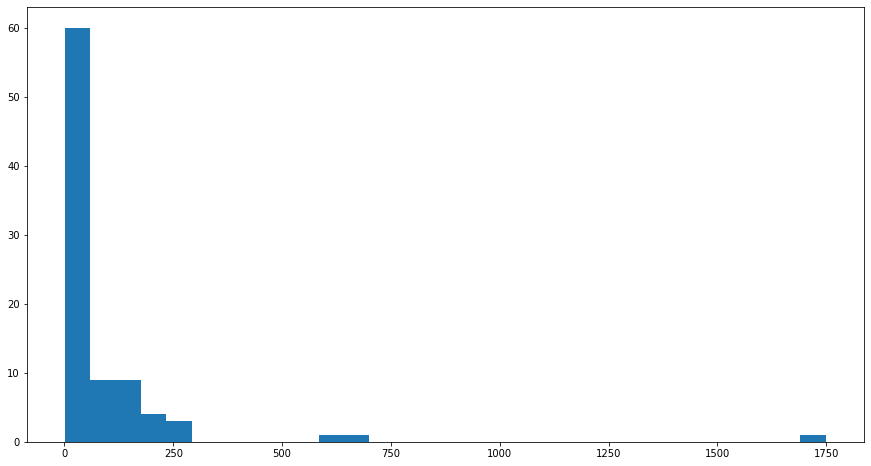

In [27]:
plt.figure(figsize=(15,8))
_ = plt.hist(chain_values, bins=30)

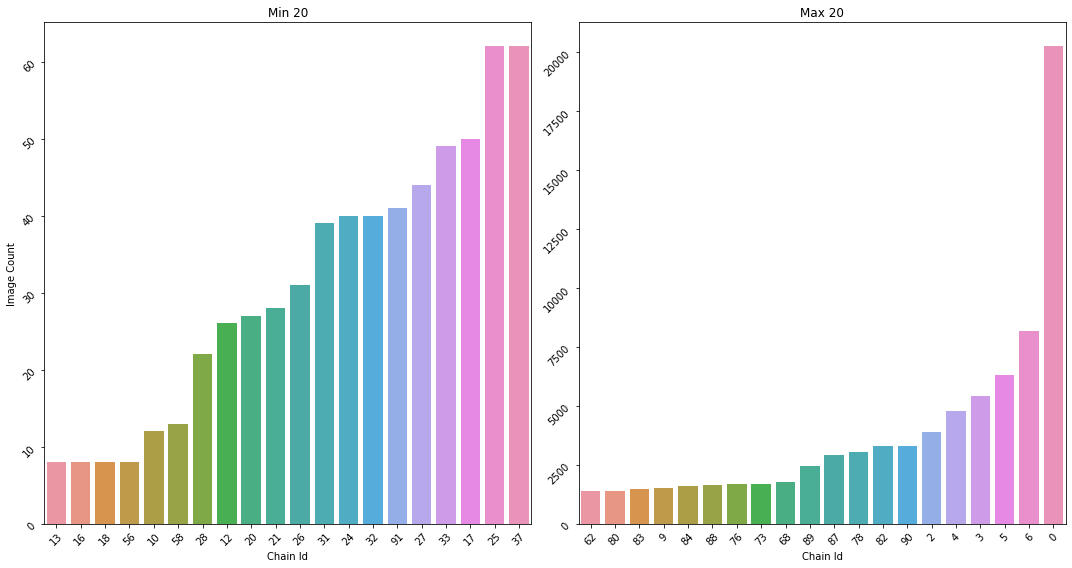

In [46]:
chain_ids = []
chain_values = []

for chain_id in df.chain.unique():
  chain_ids.append(str(chain_id))
  chain_values.append(len(df[df.chain == chain_id]))

chain_ids = [x for _, x in sorted(zip(chain_values, chain_ids))]
chain_values = sorted(chain_values)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), squeeze=False)
####When squeeze???

names = chain_ids[:20]
values = chain_values[:20]

#plt.figure(figsize=(20,10))
sns.barplot(x=names, y=values, ax=axes[0][0])  #x=hotel names, y=values
                                              ####ax=axes[0][0]
plt.xticks(rotation=45)

names = chain_ids[-20:]   #get the last 20
values = chain_values[-20:]

sns.barplot(x=names, y=values, ax=axes[0][1])
plt.xticks(rotation=45)

axes[0, 0].set_title('Min 20')
axes[0, 1].set_title('Max 20')
axes[0, 0].tick_params(labelrotation=45)
axes[0, 1].tick_params(labelrotation=45)
plt.setp(axes[-1, :], xlabel='Chain Id')
plt.setp(axes[:, 0], ylabel='Image Count')
plt.tight_layout()
plt.show()

In [40]:
#print(axes[0][0])

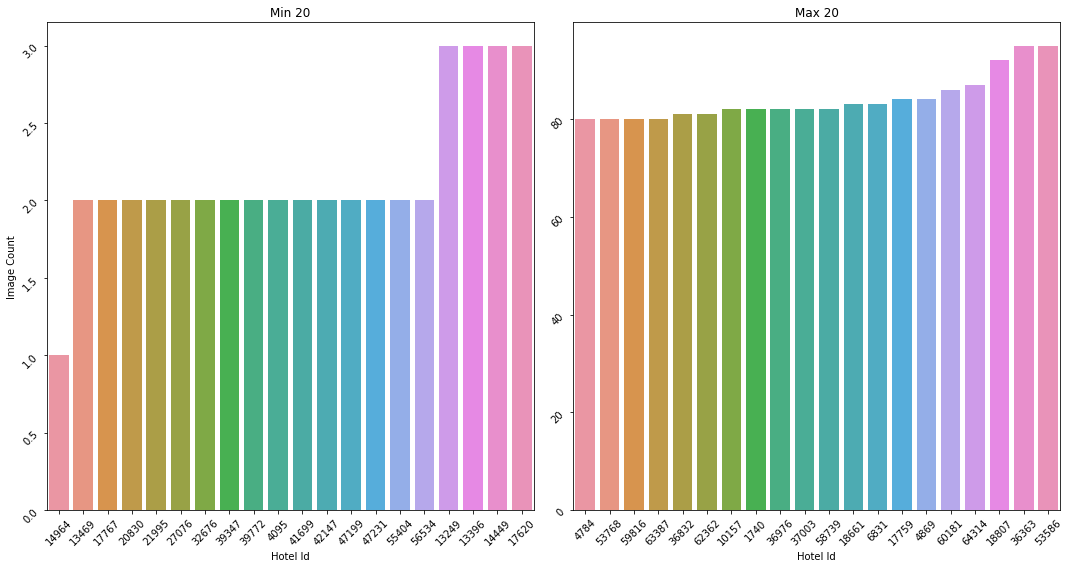

In [53]:
hotel_ids = []
image_values = []

for hotel_id in df.hotel_id.unique():
  hotel_ids.append(str(hotel_id))
  image_values.append(len(df[df.hotel_id==hotel_id]))

hotel_ids = [x for _, x in sorted(zip(image_values, hotel_ids))]
image_values = sorted(image_values)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), squeeze=False)

names = hotel_ids[:20]
values = image_values[:20]

sns.barplot(x=names, y=values, ax = axes[0][0])

names = hotel_ids[-20:]
values = image_values[-20:]

sns.barplot(x=names, y=values, ax = axes[0][1])

axes[0, 0].set_title('Min 20')
axes[0, 1].set_title('Max 20')
axes[0, 0].tick_params(labelrotation=45)
axes[0,1].tick_params(labelrotation=45)
plt.setp(axes[-1, :], xlabel='Hotel Id')
plt.setp(axes[:, 0], ylabel='Image Count')
plt.tight_layout()
plt.show()

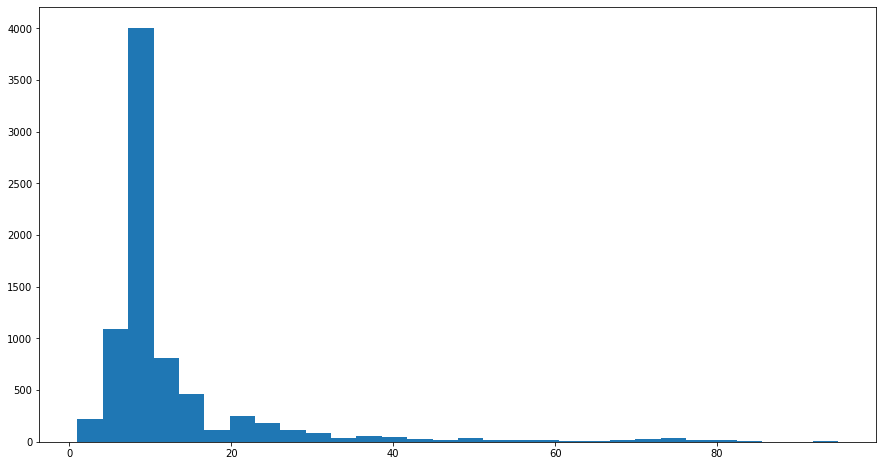

In [54]:
plt.figure(figsize=(15, 8))
_ = plt.hist(image_values, bins=30)

In [59]:
files = glob.glob("/content/gdrive/MyDrive/Datasets/Independent_projects/Human_trafficking")       #### Error here - fix

error: ignored

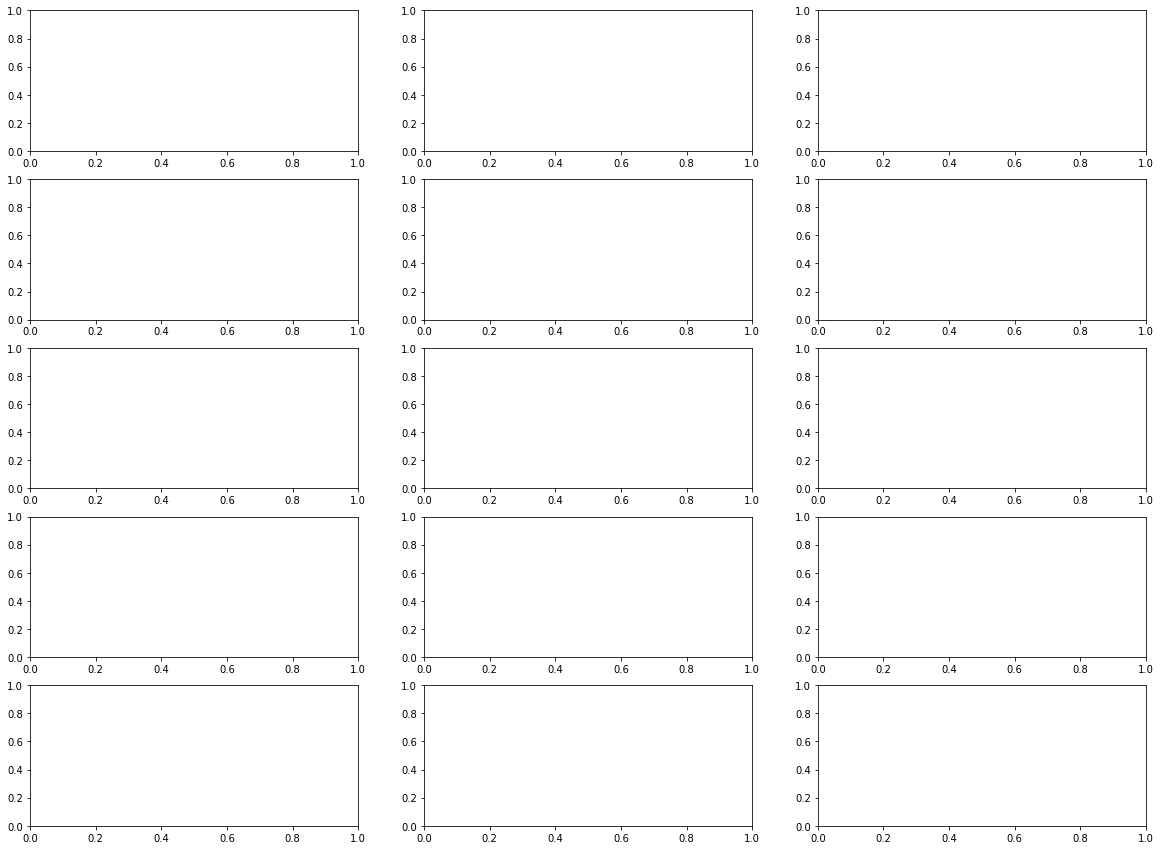

In [58]:
figure, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,15))
for i in range(15):
    path = np.random.choice(files)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(image)